## Imports / CSV

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import listdir
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score
from keras.layers import Flatten, Dense
from keras.models import Model
from keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from keras.models import Sequential
from tensorflow.keras import utils
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [338]:
pd.set_option('display.max_columns', 180)

In [339]:
pokemon_df = pd.read_csv(r'D:\GIT\classification_project\PokemonImages\pokemon.csv')
pokemon_df

,Name,Type1,Type2,Evolution
0,bulbasaur,Grass,Poison,ivysaur
1,ivysaur,Grass,Poison,venusaur
2,venusaur,Grass,Poison,NaN
3,charmander,Fire,NaN,charmeleon
4,charmeleon,Fire,NaN,charizard
...,...,...,...,...
804,stakataka,Rock,Steel,NaN
805,blacephalon,Fire,Ghost,NaN
806,zeraora,Electric,NaN,NaN
807,meltan,Steel,NaN,NaN


In [ ]:
pokemon_df = pokemon_df.drop(['Type2', 'Evolution'], axis = 1)
pokemon_df = pokemon_df.head(806)

### Data Exploration

In [340]:
pokemon_df['Type1'].value_counts() #18 types


Type1
Water       114
Normal      105
Grass        78
Bug          72
Fire         53
Psychic      53
Rock         46
Electric     40
Poison       34
Ground       32
Dark         29
Fighting     29
Dragon       27
Ghost        27
Steel        26
Ice          23
Fairy        18
Flying        3
Name: count, dtype: int64

### This will be out target variable

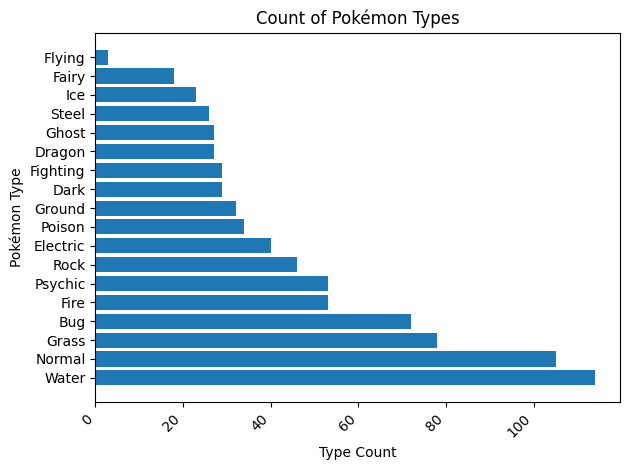

In [341]:
fig, ax = plt.subplots()

type = pokemon_df['Type1'].value_counts()
bar_labels = pokemon_df['Type1'].unique()

ax.barh(type.index, type.values)

ax.set_xlabel('Type Count')
ax.set_ylabel('Pokémon Type')
ax.set_title('Count of Pokémon Types')

plt.xticks(rotation = 45, ha= 'right') #rotating labels
plt.tight_layout() #adjusting layout 
plt.show()

## Image Listing

In [342]:
pokemon_folder = os.listdir(r'D:\GIT\classification_project\PokemonImages')

array_png = []
name_png = []

for pokemon in (pokemon_folder):
    if pokemon.endswith('.png'):
        name_png.append(pokemon)
        pokemon_loaded = image.load_img(r'D:\GIT\classification_project\PokemonImages' + '\\' + pokemon, target_size = (128, 128))
        array_png.append(image.img_to_array(pokemon_loaded)/255)

In [343]:
np_array = np.array(array_png)
np_array.shape

(806, 128, 128, 3)

In [344]:
flattened = np_array.reshape(np_array.shape[0], -1)
flattened.shape

(806, 49152)

In [345]:
poke_df = pd.DataFrame(flattened)
poke_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,...,49062,49063,49064,49065,49066,49067,49068,49069,49070,49071,49072,49073,49074,49075,49076,49077,49078,49079,49080,49081,49082,49083,49084,49085,49086,49087,49088,49089,49090,49091,49092,49093,49094,49095,49096,49097,49098,49099,49100,49101,49102,49103,49104,49105,49106,49107,49108,49109,49110,49111,49112,49113,49114,49115,49116,49117,49118,49119,49120,49121,49122,49123,49124,49125,49126,49127,49128,49129,49130,49131,49132,49133,49134,49135,49136,49137,49138,49139,49140,49141,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Array dataframe for training set

In [347]:
poke_dataframe = pd.concat([poke_df, pokemon_df], axis = 1)
poke_dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,...,49064,49065,49066,49067,49068,49069,49070,49071,49072,49073,49074,49075,49076,49077,49078,49079,49080,49081,49082,49083,49084,49085,49086,49087,49088,49089,49090,49091,49092,49093,49094,49095,49096,49097,49098,49099,49100,49101,49102,49103,49104,49105,49106,49107,49108,49109,49110,49111,49112,49113,49114,49115,49116,49117,49118,49119,49120,49121,49122,49123,49124,49125,49126,49127,49128,49129,49130,49131,49132,49133,49134,49135,49136,49137,49138,49139,49140,49141,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151,Name,Type1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bulbasaur,Grass
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ivysaur,Grass
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,venusaur,Grass
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,charmander,Fire
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Modelling

Get dummies to turn all classes into their own column.

In [348]:
poke_encoded = pd.get_dummies(pokemon_df, columns=['Type1'])
poke_encoded

,Name,Type1_Bug,Type1_Dark,Type1_Dragon,Type1_Electric,Type1_Fairy,Type1_Fighting,Type1_Fire,Type1_Flying,Type1_Ghost,Type1_Grass,Type1_Ground,Type1_Ice,Type1_Normal,Type1_Poison,Type1_Psychic,Type1_Rock,Type1_Steel,Type1_Water
0,bulbasaur,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,ivysaur,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,venusaur,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,charmander,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,charmeleon,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,marshadow,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
802,poipole,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
803,naganadel,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
804,stakataka,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


I then used astype to change all of the column types from true and flase to binary.

In [349]:
poke_encoded[['Type1_Bug','Type1_Dark','Type1_Dragon','Type1_Electric','Type1_Fairy',
                'Type1_Fighting',	'Type1_Fire',	'Type1_Flying',	'Type1_Ghost',	'Type1_Grass',
                    	'Type1_Ground',	'Type1_Ice',	'Type1_Normal',	'Type1_Poison',	'Type1_Psychic',
                            	'Type1_Rock',	'Type1_Steel',	'Type1_Water']] = poke_encoded[['Type1_Bug','Type1_Dark',
                                'Type1_Dragon','Type1_Electric','Type1_Fairy',
                'Type1_Fighting',	'Type1_Fire',	'Type1_Flying',	'Type1_Ghost',	'Type1_Grass',
                    	'Type1_Ground',	'Type1_Ice',	'Type1_Normal',	'Type1_Poison',	'Type1_Psychic',
                            	'Type1_Rock',	'Type1_Steel',	'Type1_Water']].astype(int)
poke_encoded

,Name,Type1_Bug,Type1_Dark,Type1_Dragon,Type1_Electric,Type1_Fairy,Type1_Fighting,Type1_Fire,Type1_Flying,Type1_Ghost,Type1_Grass,Type1_Ground,Type1_Ice,Type1_Normal,Type1_Poison,Type1_Psychic,Type1_Rock,Type1_Steel,Type1_Water
0,bulbasaur,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,ivysaur,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,venusaur,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,charmander,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,charmeleon,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,marshadow,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
802,poipole,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
803,naganadel,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
804,stakataka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [350]:
x = np_array.reshape(np_array.shape[0], 128, 128, 3)
y = poke_encoded[['Type1_Bug','Type1_Dark','Type1_Dragon','Type1_Electric','Type1_Fairy',
                'Type1_Fighting',	'Type1_Fire',	'Type1_Flying',	'Type1_Ghost',	'Type1_Grass',
                    	'Type1_Ground',	'Type1_Ice', 'Type1_Poison',	'Type1_Psychic',
                            	'Type1_Rock',	'Type1_Steel']].values
x.shape, y.shape

((806, 128, 128, 3), (806, 16))

Train Test Split

In [352]:

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, stratify = y)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((604, 128, 128, 3), (202, 128, 128, 3), (604, 16), (202, 16))

### Datagen

Imagedatagenerator created enhanced versions of our training images to send to the model, and can produce a more reliable model.

In [ ]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(xtrain)

Using VGG16 as out model bottom, and creating out own top.

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  

model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(16, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,782,416 (56.39 MB)

 Trainable params: 67,728 (264.56 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [356]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy', 'precision', 'recall'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,782,416 (56.39 MB)

 Trainable params: 67,728 (264.56 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In fitting the model, I call the datagen vartiable I created before. Early stopping rounds with a patience of 10 to reduce overfitting the model, and only 20 epochs due to the choice of each image being 128 by 128 pixels for better visual representation of the pokemon.

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(datagen.flow(xtrain, ytrain, batch_size=32), epochs=20, validation_data=(xtest, ytest))

d:\GIT\classification_project\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 977ms/step - accuracy: 0.1782 - loss: 2.0247 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1040 - val_loss: 1.9436 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 942ms/step - accuracy: 0.2487 - loss: 1.9738 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0990 - val_loss: 1.9321 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 946ms/step - accuracy: 0.1356 - loss: 1.9783 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3515 - val_loss: 1.9396 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 946ms/step - accuracy: 0.2647 - loss: 1.8552 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1287 - val_loss: 1.9416 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 945ms/step - accuracy: 0.2296 - loss: 1.8803 - pre

In [368]:
poke_pred = model.predict(xtest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 716ms/step


In [370]:
poke_pred

array([[0.02966953, 0.08183275, 0.05920693, ..., 0.10789259, 0.02661914,
        0.07502981],
       [0.0163628 , 0.09759913, 0.04598173, ..., 0.058652  , 0.02373084,
        0.07354589],
       [0.0152367 , 0.13347763, 0.03887029, ..., 0.10471345, 0.02629454,
        0.07751304],
       ...,
       [0.02463989, 0.12579794, 0.02776347, ..., 0.08272721, 0.01078772,
        0.106091  ],
       [0.02574431, 0.11781172, 0.03482296, ..., 0.06508365, 0.02788386,
        0.06983949],
       [0.0198659 , 0.12339495, 0.0435769 , ..., 0.07300876, 0.02062136,
        0.0697399 ]], dtype=float32)

In [371]:
pred_classes = np.argmax(poke_pred, axis = 1)
pred_classes

array([13,  9,  1,  1,  1,  3,  1,  1,  3, 13,  3,  3, 12,  3,  9,  3,  1,
        1, 11,  5,  9,  3,  3, 11, 13, 10, 11,  1,  3,  9,  1,  1,  1,  3,
       13,  1, 11, 13, 13,  3,  1,  1,  3,  1,  3,  3,  1,  5,  3,  3,  1,
       11,  3,  1, 15,  1, 13,  3,  1,  9,  1, 11,  1,  3,  1,  3, 11,  3,
        1,  9,  3,  1,  1,  1, 13,  3,  3,  3,  3,  1,  3, 11,  1, 12,  1,
        3,  1, 11,  3,  1,  1,  3,  3,  3,  1,  1,  1,  1,  1,  1,  3, 13,
        3, 11, 11,  3,  1,  3,  1,  1,  1,  3, 10,  1,  3,  1,  1, 11,  1,
        3,  1,  3,  3,  9,  1,  1,  1,  3,  3, 11,  3, 13,  5, 11, 13, 11,
       13,  5,  1, 13,  1,  9,  3,  1,  1,  1,  3,  9,  1,  3,  3,  3,  1,
        3,  3, 13,  9,  1,  1,  1, 11,  1,  3,  3, 15,  3,  1, 12,  9,  3,
        3,  1,  1, 13,  1,  9,  3,  3,  1,  1,  1,  3,  3,  3,  1,  1,  1,
        3, 15,  9,  9,  1, 12,  1,  3,  1, 11, 11,  1,  3,  3, 10])

## Testing

Afterall, the model produces very poor scores. Some tweaks were made along the way to test the scores of different techniques, but the model struggles to differentiate between the types of pokemon. this could be due to the lack of correlation most of the pokemon have, while sharing the same type. For example, some fire types can look vastly different than other fire types.

In [372]:
accuracy = accuracy_score(np.argmax(ytest, axis = 1), pred_classes)
accuracy

0.04950495049504951

In [451]:
rec = recall_score(np.argmax(ytest, axis = 1), pred_classes, average = 'macro')
rec

np.float64(0.08129578754578755)

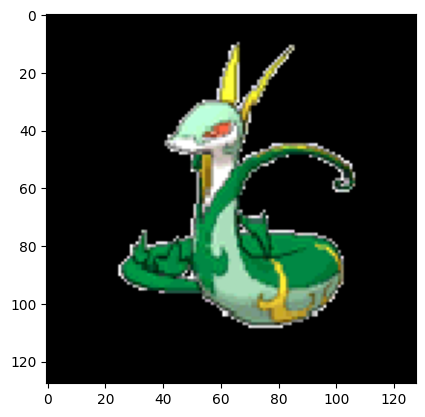

In [373]:
plt.imshow(array_png[600])

In [374]:
test = array_png[610]

In [375]:
test_pred = np.expand_dims(test, axis = 0)

In [376]:
np.argmax(model.predict(test_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


np.int64(3)

In [377]:
pred_classes

array([13,  9,  1,  1,  1,  3,  1,  1,  3, 13,  3,  3, 12,  3,  9,  3,  1,
        1, 11,  5,  9,  3,  3, 11, 13, 10, 11,  1,  3,  9,  1,  1,  1,  3,
       13,  1, 11, 13, 13,  3,  1,  1,  3,  1,  3,  3,  1,  5,  3,  3,  1,
       11,  3,  1, 15,  1, 13,  3,  1,  9,  1, 11,  1,  3,  1,  3, 11,  3,
        1,  9,  3,  1,  1,  1, 13,  3,  3,  3,  3,  1,  3, 11,  1, 12,  1,
        3,  1, 11,  3,  1,  1,  3,  3,  3,  1,  1,  1,  1,  1,  1,  3, 13,
        3, 11, 11,  3,  1,  3,  1,  1,  1,  3, 10,  1,  3,  1,  1, 11,  1,
        3,  1,  3,  3,  9,  1,  1,  1,  3,  3, 11,  3, 13,  5, 11, 13, 11,
       13,  5,  1, 13,  1,  9,  3,  1,  1,  1,  3,  9,  1,  3,  3,  3,  1,
        3,  3, 13,  9,  1,  1,  1, 11,  1,  3,  3, 15,  3,  1, 12,  9,  3,
        3,  1,  1, 13,  1,  9,  3,  3,  1,  1,  1,  3,  3,  3,  1,  1,  1,
        3, 15,  9,  9,  1, 12,  1,  3,  1, 11, 11,  1,  3,  3, 10])

I do believe the model does not guess totally random, as some listed below are correct, and alot of the pokemon predictions are somewhat in the ballpark of what could be considered logical when guessing their types.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


'dark'

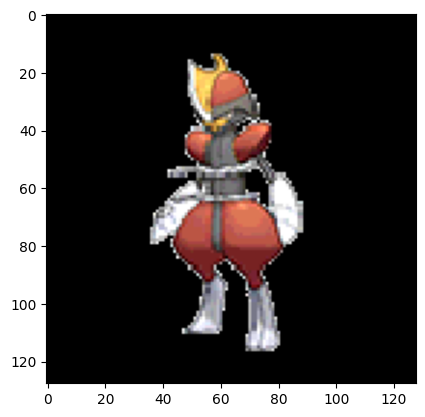

In [431]:
test = array_png[51]
plt.imshow(test)
test_pred = np.expand_dims(test, axis = 0)
value_names[np.argmax(model.predict(test_pred))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


'electric'

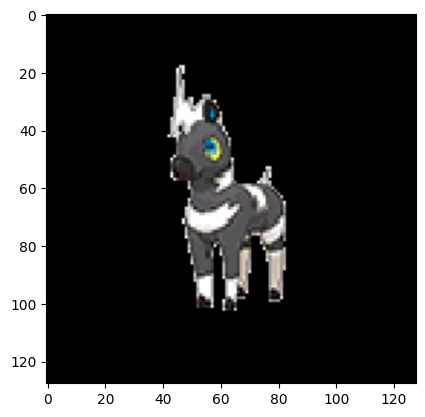

In [436]:
test = array_png[56]
plt.imshow(test)
test_pred = np.expand_dims(test, axis = 0)
value_names[np.argmax(model.predict(test_pred))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


'normal'

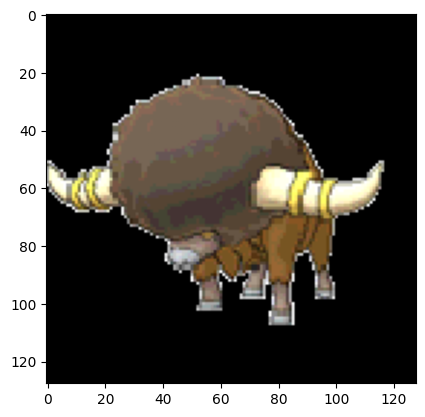

In [440]:
test = array_png[59]
plt.imshow(test)
test_pred = np.expand_dims(test, axis = 0)
value_names[np.argmax(model.predict(test_pred))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


'dark'

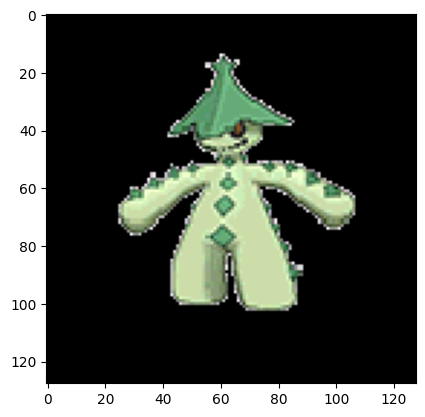

In [469]:
test = array_png[77]
plt.imshow(test)
test_pred = np.expand_dims(test, axis = 0)
value_names[np.argmax(model.predict(test_pred))]